## Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#se vc usa tensorflow 2.0 use o import abaixo
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# se vc usa o tensorflow 1.x comente aslinha acima e descomente a linha que segue
#import tensorflow as tf


import matplotlib.pyplot as plt
import seaborn as sns


Instructions for updating:
non-resource variables are not supported in the long term


## Dataset

In [2]:

#dataset com atributos sobre nódulos, indica se é benigno ou maligno
table_ = pd.read_csv("../data/cancer.csv")


print("Todos os nomes dos atributos")
table_.info()


Todos os nomes dos atributos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 1

In [3]:

#lista de atributos que serão usados no x
dataset_x_features = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity",
                     "mean concave points", "mean symmetry", "mean fractal dimension", "radius error", "texture error", "perimeter error", 
                      "area error", "smoothness error", "compactness error", "concavity error", "concave points error", "symmetry error", 
                      "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness", 
                      "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension"]

#normalização dos atributos
table_[dataset_x_features] = table_[dataset_x_features].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

display(table_)

#convertendo o dataframe pandas para ndarray (x e y)
dataset_x =  table_[dataset_x_features].to_numpy()
dataset_y =  table_['target'].to_numpy()

#obtendo a quantidade de classes
num_labels = table_['target'].nunique()


,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


## Divisão entre treino e validação

In [4]:
#90% para treino e 10% para teste
TRAIN_X, VALID_X = train_test_split(dataset_x, test_size=0.1, random_state=0, stratify=dataset_y)
TRAIN_Y, VALID_Y = train_test_split(dataset_y, test_size=0.1, random_state=0, stratify=dataset_y)

#shapes dos conjuntos de treino e validação
print(TRAIN_X.shape, TRAIN_Y.shape)
print(VALID_X.shape, VALID_Y.shape)


(512, 30) (512,)
(57, 30) (57,)


## Usando um modelo de REDE NEURAL

In [5]:
#a função recebe como parametro a quantidade de features e número de classes no problema
def build_net(n_features, n_classes):
    
    #Por praticidade os tensores são salvos neste dicionário
    Dic = {}
    
    # ---- INICIO DA REDE NEURAL ----
    
    # Placeholders (X (entrada) e Y (saída) da rede)
    placeholder_X = tf.placeholder(dtype=tf.float32, shape=[None, n_features])
    Dic["placeholder_X"] = placeholder_X
    
    placeholder_Y = tf.placeholder(dtype=tf.int64, shape=[None])
    Dic["placeholder_Y"] = placeholder_Y

    # camada escondida
    hidden_layer1 = tf.layers.dense(placeholder_X, 10, activation=tf.nn.relu)
    Dic["layer1"] = hidden_layer1
    
    # camada escondida
    hidden_layer2 = tf.layers.dense(hidden_layer1, 20, activation=tf.nn.relu)
    Dic["layer2"] = hidden_layer2
    
    # camada escondida
    hidden_layer3 = tf.layers.dense(hidden_layer2, 10, activation=tf.nn.relu)
    Dic["layer3"] = hidden_layer3
    
    #camada de saída
    out = tf.layers.dense(hidden_layer3, n_classes, name="output")
     
    # ---- FIM DA REDE NEURAL ----
    
    #adaptando o Label Y para o modelo One-Hot Label
    one_hot = tf.one_hot(placeholder_Y, depth=n_classes)
    
    # Função de perda/custo/erro
    loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot, logits=out) 
    Dic["loss"] = loss
    
    # Otimizador
    opt = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
    Dic["opt"] = opt
    
    #Softmax
    softmax = tf.nn.softmax(out)
    Dic["softmax"] = softmax
    
    #Classe
    class_ = tf.argmax(softmax,1)
    Dic["class"] = class_
    
    #Acurácia
    compare_prediction = tf.equal(class_, placeholder_Y)
    accuracy = tf.reduce_mean(tf.cast(compare_prediction, tf.float32))
    Dic["accuracy"] = accuracy
    
    return Dic

In [6]:
#Iniciando
sess = tf.InteractiveSession()

#obtendo o número de features 
n_features = dataset_x.shape[1]

#construindo o modelo de rede
Dic_cg = build_net(n_features, num_labels)

#inicializando as variveis do tensorflow
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


O erro na época 0 é 0.7077857
A accurácia do treino é: 0.37304688
A accurácia da validacao é: 0.36842105
O erro na época 100 é 0.13853297
A accurácia do treino é: 0.9628906
A accurácia da validacao é: 0.9649123
O erro na época 200 é 0.07960736
A accurácia do treino é: 0.98046875
A accurácia da validacao é: 0.9649123
O erro na época 300 é 0.06413698
A accurácia do treino é: 0.98046875
A accurácia da validacao é: 0.98245615
O erro na época 400 é 0.056469984
A accurácia do treino é: 0.9824219
A accurácia da validacao é: 0.98245615
O erro na época 500 é 0.051943105
A accurácia do treino é: 0.9824219
A accurácia da validacao é: 0.98245615
O erro na época 600 é 0.048501905
A accurácia do treino é: 0.98828125
A accurácia da validacao é: 0.98245615
O erro na época 700 é 0.048325542
A accurácia do treino é: 0.9902344
A accurácia da validacao é: 0.98245615
O erro na época 800 é 0.046993375
A accurácia do treino é: 0.9902344
A accurácia da validacao é: 0.98245615
O erro na época 900 é 0.0460212
A

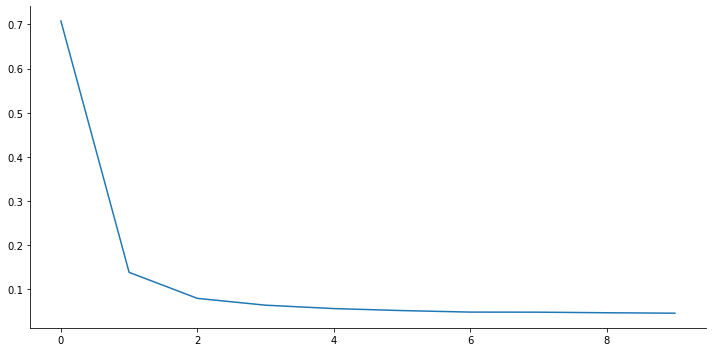

acc train


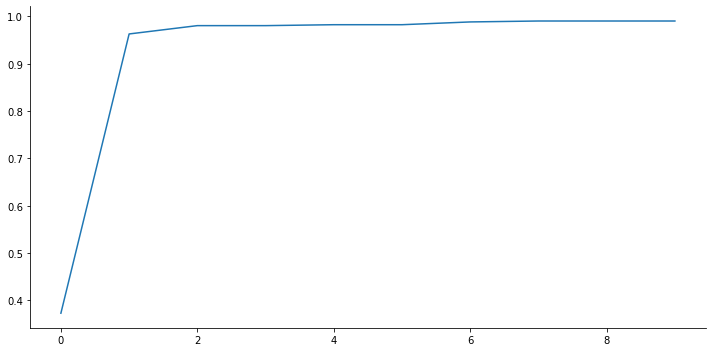

acc valid


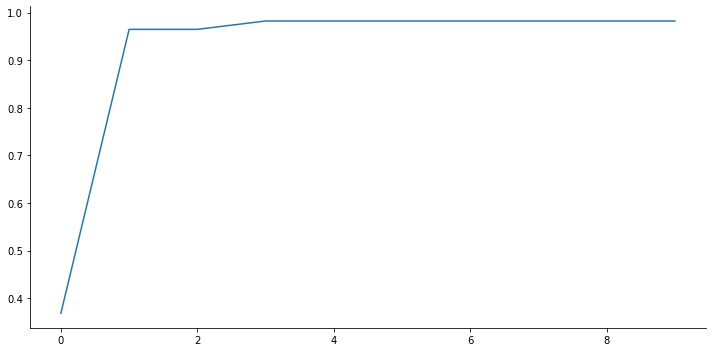

In [7]:
#definindo o número de épocas
epochs = 1000

historic_train_error = []
historic_train_acc = []
historic_valid_acc = []

for i in range(epochs):
    
    sess.run(Dic_cg["opt"], feed_dict={Dic_cg["placeholder_X"]: TRAIN_X, Dic_cg["placeholder_Y"]: TRAIN_Y})
    
    # a cada 100 épocas o erro é impresso
    if  i % 100 == 0:
        erro_train = sess.run(Dic_cg["loss"], feed_dict={Dic_cg["placeholder_X"]: TRAIN_X, Dic_cg["placeholder_Y"]: TRAIN_Y})
        print("O erro na época", i,"é", erro_train)
        historic_train_error.append(erro_train)
        
        
        #após o fim do treino, é calculada a acurácia
        acc = sess.run(Dic_cg["accuracy"], feed_dict={Dic_cg["placeholder_X"]: TRAIN_X, Dic_cg["placeholder_Y"]: TRAIN_Y})
        print("A accurácia do treino é:", acc)
        historic_train_acc.append(acc)
        
        
        acc = sess.run(Dic_cg["accuracy"], feed_dict={Dic_cg["placeholder_X"]: VALID_X, Dic_cg["placeholder_Y"]: VALID_Y})
        print("A accurácia da validacao é:", acc)
        historic_valid_acc.append(acc)
        

        #após o fim do treino, é calculada a acurácia



print("erro train")
sns.relplot(data=historic_train_error, kind="line",  palette="cool", aspect=2)


plt.pause(0.1)
print("acc train")
sns.relplot(data=historic_train_acc, kind="line",  palette="cool", aspect=2)

plt.pause(0.1)
print("acc valid")
sns.relplot(data=historic_valid_acc, kind="line",  palette="cool", aspect=2)



## Usando o modelo KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

logreg = KNeighborsClassifier(n_neighbors=20)
#treino
logreg.fit(TRAIN_X, TRAIN_Y)
#validação
logreg.score(VALID_X, VALID_Y)


0.9649122807017544

In [ ]:
## Usando uma

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
#treino
clf.fit(TRAIN_X, TRAIN_Y)
#validação
clf.score(VALID_X, VALID_Y)

0.9122807017543859